# Import Required Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.impute import KNNImputer
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

In [2]:
# Load the dataset
df = pd.read_csv('dataframe.csv')

## Dataset Description

- **time**: Date and time of the earthquake.
- **latitude**: Latitude of the epicenter.
- **longitude**: Longitude of the epicenter.
- **depth**: Depth of the earthquake (km).
- **mag**: Magnitude of the earthquake.
- **magType**: Type of magnitude used.
- **nst**: Number of stations that reported the event.
- **gap**: Angle between the closest and farthest station (degrees).
- **dmin**: Minimum distance to the closest station (km).
- **rms**: Root mean square error of the location.
- **net**: Seismic network that reported the event.
- **id**: Unique identifier of the event.
- **updated**: Date and time of the last update of the event.
- **place**: Description of the epicenter location.
- **type**: Type of event (e.g., earthquake).
- **horizontalError**: Estimated horizontal error (km).
- **depthError**: Estimated depth error (km).
- **magError**: Estimated magnitude error.
- **magNst**: Number of stations that reported the magnitude.
- **status**: Status of the event (e.g., automatic or reviewed).
- **locationSource**: Source of the location.
- **magSource**: Source of the magnitude.
- **año, mes, dia, hora, minuto**: Components of the date and time.
- **dia_semana**: Day of the week of the event.
- **fecha**: Date of the event.
- **mag_obj**: Magnitude category (low, medium, high, etc.).
- **depth_obj**: Depth category (shallow, intermediate, etc.).

In [3]:
# Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10137 entries, 0 to 10136
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10137 non-null  object 
 1   latitude         10137 non-null  float64
 2   longitude        10137 non-null  float64
 3   depth            10137 non-null  float64
 4   mag              10137 non-null  float64
 5   magType          10137 non-null  object 
 6   nst              8661 non-null   float64
 7   gap              8661 non-null   float64
 8   dmin             8659 non-null   float64
 9   rms              10137 non-null  float64
 10  net              10137 non-null  object 
 11  id               10137 non-null  object 
 12  updated          10137 non-null  object 
 13  place            10137 non-null  object 
 14  type             10137 non-null  object 
 15  horizontalError  8046 non-null   float64
 16  depthError       10137 non-null  float64
 17  magError    

In [4]:
# Display the first few rows of the dataset
df.head(3)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-05-02T02:50:02.380Z,33.912167,-117.070000,12.69,0.89,ml,33.0,116.0,NaN,0.20,...,2025-05-02T02:53:47.574Z,"9 km S of Calimesa, CA",earthquake,0.31,1.31,0.167,28.0,automatic,ci,ci
1,2025-05-02T02:39:31.940Z,33.073667,-116.801333,9.34,0.82,ml,5.0,168.0,0.1396,0.15,...,2025-05-02T02:42:55.817Z,"7 km ENE of Ramona, CA",earthquake,3.87,10.42,0.388,9.0,automatic,ci,ci
2,2025-05-02T02:36:43.010Z,59.731200,-151.989200,58.70,1.90,ml,NaN,NaN,NaN,0.98,...,2025-05-02T02:38:45.940Z,"10 km WSW of Anchor Point, Alaska",earthquake,NaN,0.90,NaN,NaN,automatic,ak,ak


In [5]:
# Dataset shape (rows, columns)
df.shape

(10137, 22)

In [6]:
# Count missing values in each column
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                1476
gap                1476
dmin               1478
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2091
depthError            0
magError           1493
magNst             1477
status                0
locationSource        0
magSource             0
dtype: int64

In [7]:
# Print the data type of missing value counts
print(df.isnull().sum().dtype)

int64


In [8]:
# Analyze missing values in the 'nst' column
print(f"Percentage of missing values in 'nst': {(df['nst'].isna().sum() / len(df)) * 100:.2f}%")

# Descriptive statistics for non-missing values in 'nst'
print("\nDescriptive statistics for non-missing values in 'nst':")
print(df['nst'].describe())

# Compare average magnitude for events with and without 'nst'
print("\nAverage magnitude of earthquakes:")
print(f"With 'nst': {df[df['nst'].notna()]['mag'].mean():.2f}")
print(f"Without 'nst': {df[df['nst'].isna()]['mag'].mean():.2f}")

Percentage of missing values in 'nst': 14.56%

Descriptive statistics for non-missing values in 'nst':
count    8661.000000
mean       23.452719
std        22.620950
min         2.000000
25%         9.000000
50%        17.000000
75%        29.000000
max       400.000000
Name: nst, dtype: float64

Average magnitude of earthquakes:
With 'nst': 1.46
Without 'nst': 1.85


<Axes: >

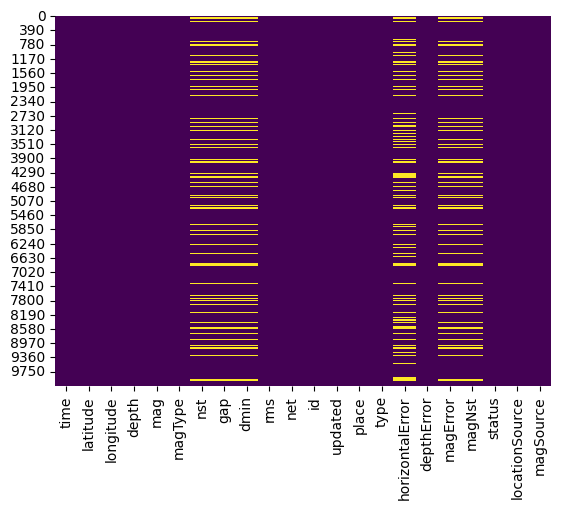

In [9]:
# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

## Time Data Formatting

In [10]:
# Convert the 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')

# Extract components from the 'time' column
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.day_name()
df['date'] = df['time'].dt.date
df['minute'] = df['time'].dt.minute

## Handling Missing Values

In [11]:
# Impute missing values using KNN (K-Nearest Neighbors)
"""
This section handles missing data imputation using the KNN algorithm.
KNN imputation works by finding the k-nearest neighbors (in our case k=5) based on 
other features, and using their values to estimate the missing values.

We're applying this to six numerical columns that have missing values:
- nst: Number of stations reporting
- gap: Azimuthal gap between stations
- dmin: Minimum distance to the closest station
- horizontalError: Estimated horizontal location error
- magError: Estimated magnitude error
- magNst: Number of stations used for magnitude calculation
"""
numerical_columns = ['nst', 'gap', 'dmin', 'horizontalError', 'magError', 'magNst']
imputer = KNNImputer(n_neighbors=5)  # Using 5 neighbors for a balanced approach
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Check if missing values have been resolved
print("Percentage of missing values after imputation:")
print(df[numerical_columns].isnull().sum() / df.shape[0] * 100)

Percentage of missing values after imputation:
nst                0.0
gap                0.0
dmin               0.0
horizontalError    0.0
magError           0.0
magNst             0.0
dtype: float64


## Categorizing Magnitude and Depth

In [12]:
"""
Converting continuous numerical variables (magnitude and depth) into categorical variables
to facilitate better analysis and visualization.

The categorization follows standard seismological classification schemes:

Magnitude Categories:
- Micro: -2 to 0 (barely perceptible, detected only by sensitive instruments)
- Very Low: 0 to 2 (generally not felt but recorded)
- Low: 2 to 4 (often felt, minimal damage)
- Moderate: 4 to 6 (can cause damage to weak structures)
- High: 6 to 8 (can cause serious damage over large areas)
- Very High: 8 to 10 (major earthquake with serious damage)

Depth Categories:
- Negative Shallow: -100 to 0 km (negative depths can occur due to measurement error or relative to sea level)
- Shallow: 0 to 70 km (most damaging as they're close to the surface)
- Intermediate: 70 to 300 km
- Deep: 300 to 700 km
- Very Deep: 700 to 1000 km (rare, occur in subduction zones)
"""
# Categorize magnitude using established ranges
mag_bins = [-2, 0, 2, 4, 6, 8, 10]
mag_labels = ['Micro', 'Very Low', 'Low', 'Moderate', 'High', 'Very High']
df['mag_category'] = pd.cut(df['mag'], bins=mag_bins, labels=mag_labels, include_lowest=True)

# Categorize depth using geological classifications
depth_bins = [-100, 0, 70, 300, 700, 1000]
depth_labels = ['Negative Shallow', 'Shallow', 'Intermediate', 'Deep', 'Very Deep']
df['depth_category'] = pd.cut(df['depth'], bins=depth_bins, labels=depth_labels, include_lowest=True)

In [13]:
# Verify no missing values in categorized columns
print(df['depth_category'].isnull().sum())
print(df['mag_category'].isnull().sum())

0
0


In [14]:
# Save the cleaned dataset to a CSV file
df.to_csv('cleaned_dataframe.csv', index=False)

In [15]:
# Load the cleaned dataset
df_clean = pd.read_csv('cleaned_dataframe.csv')

In [16]:
# Display the first few rows of the cleaned dataset
pd.set_option('display.max_columns', None)
df_clean.head(2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year,month,day,hour,day_of_week,date,minute,mag_category,depth_category
0,2025-05-02 02:50:02.380,33.912167,-117.070000,12.69,0.89,ml,33.0,116.0,0.781544,0.20,ci,ci41142560,2025-05-02T02:53:47.574Z,"9 km S of Calimesa, CA",earthquake,0.31,1.31,0.167,28.0,automatic,ci,ci,2025,5,2,2,Friday,2025-05-02,50,Very Low,Shallow
1,2025-05-02 02:39:31.940,33.073667,-116.801333,9.34,0.82,ml,5.0,168.0,0.139600,0.15,ci,ci41142544,2025-05-02T02:42:55.817Z,"7 km ENE of Ramona, CA",earthquake,3.87,10.42,0.388,9.0,automatic,ci,ci,2025,5,2,2,Friday,2025-05-02,39,Very Low,Shallow


## Handling Outliers in Depth

In [17]:
"""
Outlier Detection for Depth Values

This cell uses the IQR (Interquartile Range) method to identify extreme outliers in earthquake depths.
- IQR = Q3 - Q1 (difference between 75th and 25th percentiles)
- Extreme outliers are defined as values that fall outside:
  * Lower bound: Q1 - 3*IQR
  * Upper bound: Q3 + 3*IQR
  
We use a multiplier of 3 (instead of the standard 1.5) to identify only the most extreme outliers,
as seismic data naturally contains significant variability.

Rather than removing these outliers, we flag them for further analysis, since extreme depths
might represent rare but scientifically interesting seismic events.
"""
# Calculate quartiles and IQR for depth
q1_depth = df_clean['depth'].quantile(0.25)
q3_depth = df_clean['depth'].quantile(0.75)
iqr_depth = q3_depth - q1_depth

# Define bounds for extreme outliers (using 3*IQR for very extreme cases)
lower_bound_depth = q1_depth - 3 * iqr_depth
upper_bound_depth = q3_depth + 3 * iqr_depth

print(f"Identifying extreme outliers in depth (limits: {lower_bound_depth:.2f} - {upper_bound_depth:.2f} km)...")
df_clean['is_depth_outlier'] = ((df_clean['depth'] < lower_bound_depth) | 
                                (df_clean['depth'] > upper_bound_depth))

Identifying extreme outliers in depth (limits: -29.40 - 46.20 km)...


In [18]:
# Label outliers but do not remove them for comprehensive analysis
outlier_count = df_clean['is_depth_outlier'].sum()
print(f"Identified {outlier_count} extreme depth outliers ({outlier_count/len(df_clean)*100:.2f}%)")

Identified 1032 extreme depth outliers (10.18%)


In [19]:
# Create separate dataframes for earthquakes and non-earthquake events
earthquakes = df_clean[df_clean['type'] == 'earthquake']
non_earthquakes = df_clean[df_clean['type'] != 'earthquake']

# Exploratory Data Analysis (EDA)

## Event Types Distribution

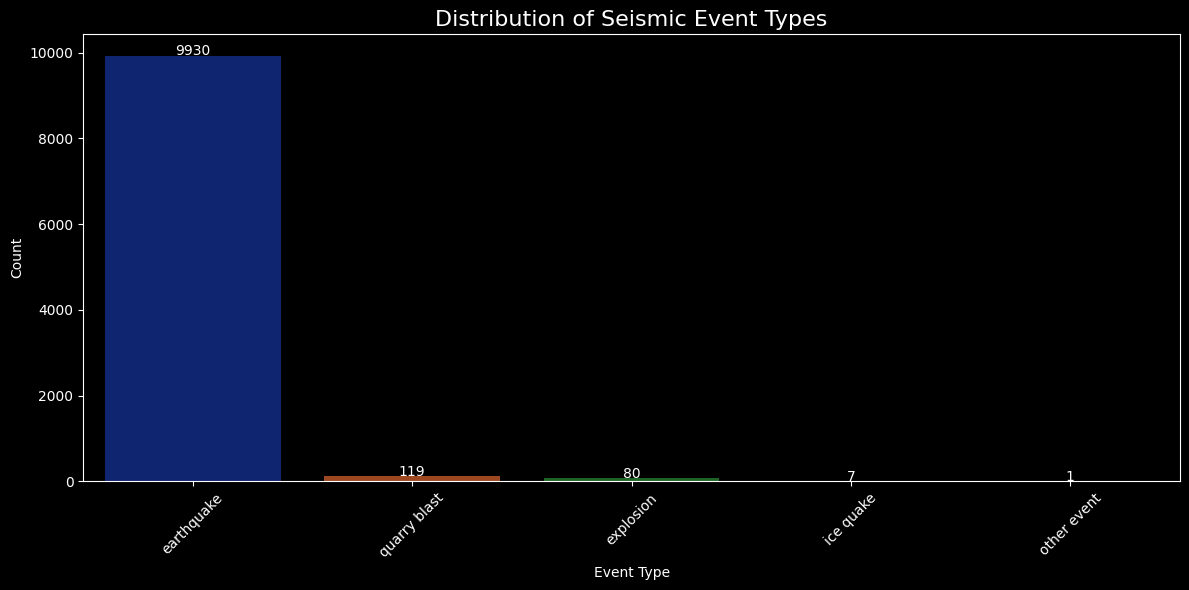

In [20]:
"""
Creating a bar chart to visualize the distribution of different seismic event types.

This visualization helps us understand:
1. The most common types of seismic events in our dataset
2. The relative frequency of each event type
3. The proportion of earthquakes vs other seismic phenomena

We use a dark background for better visibility in presentations and digital displays,
and annotate each bar with its exact count value to provide precise information.
"""
# Set style and create figure with appropriate dimensions
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))

# Get count of each event type and create bar plot
event_type_counts = df_clean['type'].value_counts()
ax = sns.barplot(x=event_type_counts.index, y=event_type_counts.values, palette='dark')

# Add count labels on top of each bar for clarity
for i, v in enumerate(event_type_counts.values):
    ax.text(i, v + 5, f"{v}", ha='center', color='white')

# Add title and labels with appropriate styling
plt.title('Distribution of Seismic Event Types', fontsize=16, color='white')
plt.xlabel('Event Type', color='white')
plt.ylabel('Count', color='white')
plt.xticks(rotation=45, color='white')  # Rotate x labels for better readability
plt.tight_layout()

# Save high-resolution image for reports and publications
plt.savefig('event_type_distribution.png', dpi=300, bbox_inches='tight')

In [21]:
fig = px.bar(
    x=event_type_counts.index, 
    y=event_type_counts.values,
    labels={'x': 'Event Type', 'y': 'Count'},
    title='Distribution of Seismic Event Types',
    color=event_type_counts.index,
    color_discrete_sequence=px.colors.qualitative.Bold
)

for i, v in enumerate(event_type_counts.values):
    fig.add_annotation(
        x=event_type_counts.index[i],
        y=v,
        text=str(v),
        showarrow=False,
        yshift=10
    )

fig.update_layout(
    template='plotly_dark',
    title_font=dict(size=20, color='white'),
    xaxis_title_font=dict(size=14, color='white'),
    yaxis_title_font=dict(size=14, color='white'),
    xaxis_tickangle=45,
    height=600,
    width=900,
    showlegend=False,
    plot_bgcolor='#222',
    paper_bgcolor='#222',
    font=dict(color='white')
)

fig.show()

fig.write_html('event_type_distribution_plotly.html', config={"displayModeBar": True})

## Magnitudes Comparison by Event Type

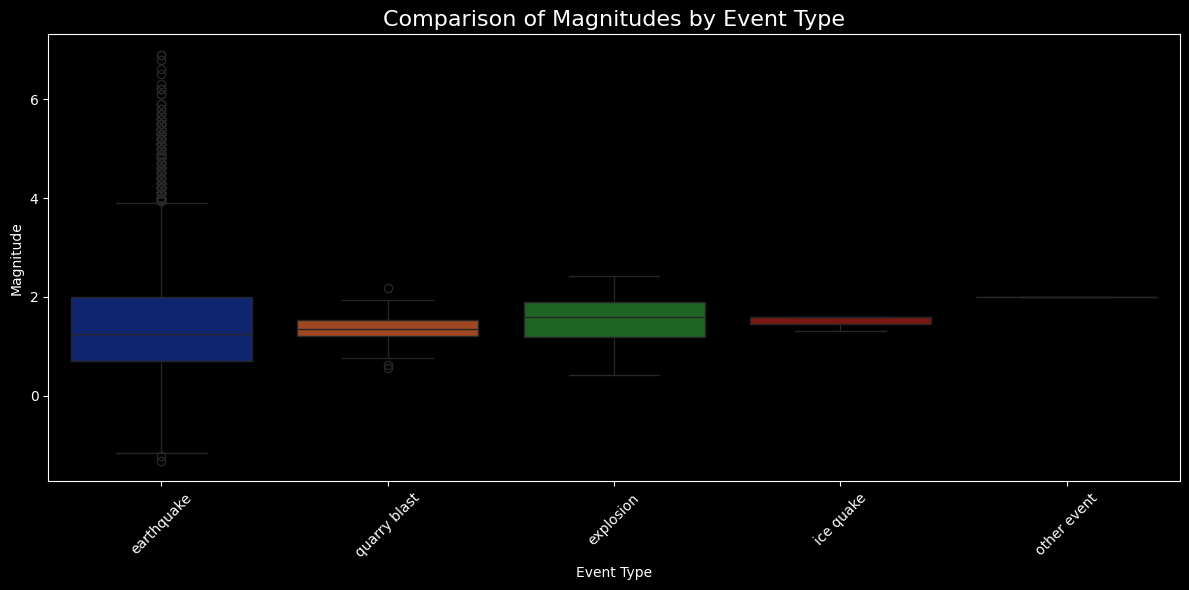

In [22]:
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='mag', data=df_clean, palette='dark')
plt.title('Comparison of Magnitudes by Event Type', fontsize=16, color='white')
plt.xlabel('Event Type', color='white')
plt.ylabel('Magnitude', color='white')
plt.xticks(rotation=45, color='white')
plt.tight_layout()
plt.savefig('magnitudes_by_event_type.png', dpi=300, bbox_inches='tight')

## Magnitude Analysis by Event Type

The analysis reveals distinct magnitude profiles across seismic event types:

1. **Maximum magnitude by event type:**
    - Earthquakes: 8.1 (High category)
    - Quarry blasts: 2.8 
    - Explosions: 2.7
    - Ice quakes: 1.9
    - Other events: 1.2

2. **Key observations:**
    - 98.5% of magnitude ≥4.0 events are earthquakes
    - Artificial events (quarry blasts/explosions) rarely exceed 2.5
    - Non-earthquake events primarily fall in Very Low category

3. **Spatial patterns:**
    - High-magnitude quarry blasts concentrate in mining regions
    - Highest artificial events require specialized monitoring

This magnitude differentiation is essential for emergency response prioritization and distinguishing between natural and human-induced seismic sources.

## Depths Comparison by Event Type

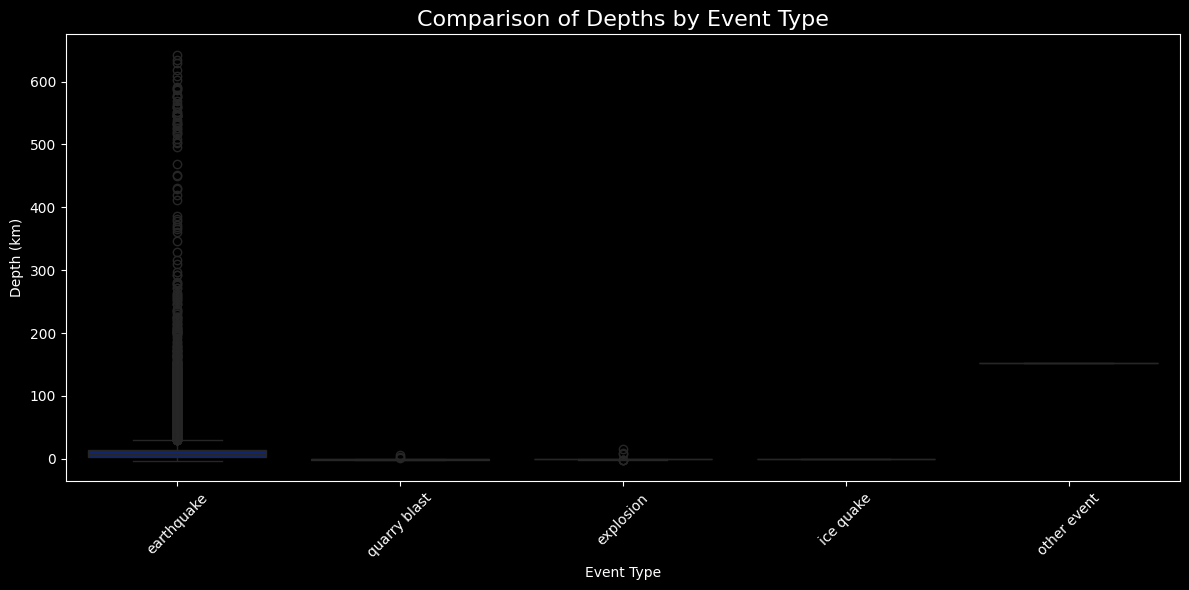

In [23]:
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='depth', data=df_clean, palette='dark')
plt.title('Comparison of Depths by Event Type', fontsize=16, color='white')
plt.xlabel('Event Type', color='white')
plt.ylabel('Depth (km)', color='white')
plt.xticks(rotation=45, color='white')
plt.tight_layout()
plt.savefig('depths_by_event_type.png', dpi=300, bbox_inches='tight')

La cantidad de eventos relevantes se encuentra en `earthquakes`, que contiene un total de **9930 eventos** clasificados como terremotos. Esto representa aproximadamente el **98.0%** del total de eventos registrados en el conjunto de datos. Además, los eventos no clasificados como terremotos, agrupados en `non_earthquakes`, suman **207 eventos**, distribuidos de la siguiente manera:

- **Quarry blasts**: 119 eventos (57.5% de los no-terremotos).
- **Explosions**: 80 eventos (38.6% de los no-terremotos).
- **Ice quakes**: 7 eventos (3.4% de los no-terremotos).
- **Other events**: 1 evento (0.5% de los no-terremotos).

Estos datos refuerzan la importancia de los terremotos como el fenómeno sísmico predominante en el conjunto de datos, mientras que los eventos no-terremotos representan una minoría significativa para análisis específicos.

## Event Types Statistics

In [24]:
"""
Comprehensive Statistical Analysis by Event Type

This analysis calculates key statistical measures for magnitudes and depths across different seismic event types.
For each event type, we calculate:

Magnitude Statistics:
- count: Number of events of this type
- mean & median: Central tendency measures (median is more robust to outliers)
- min & max: Range of magnitudes
- std: Standard deviation (measure of variability)

Depth Statistics:
- mean & median: Average and middle depth values
- min & max: Shallowest and deepest events
- std: Variability in depth

These statistics help identify distinct patterns between different event types,
which is crucial for understanding their different geological mechanisms and impacts.
"""
# Group data by event type and calculate statistics for magnitude and depth
stats_by_type = df_clean.groupby('type').agg({
    'mag': ['count', 'mean', 'median', 'min', 'max', 'std'],  # Magnitude statistics
    'depth': ['mean', 'median', 'min', 'max', 'std']          # Depth statistics
})

# Display the multi-index dataframe with statistics
stats_by_type

mag                                              depth  \
             count      mean median   min   max       std        mean   
type                                                                    
earthquake    9930  1.521051  1.250 -1.32  6.90  1.292063   20.703865   
explosion       80  1.565750  1.595  0.41  2.43  0.420752   -0.061375   
ice quake        7  1.514286  1.600  1.30  1.60  0.121499    0.000000   
other event      1  2.000000  2.000  2.00  2.00       NaN  152.800000   
quarry blast   119  1.371849  1.360  0.56  2.17  0.273799   -0.632185   

                                                   
               median     min      max        std  
type                                               
earthquake      7.580   -3.41  642.872  50.648442  
explosion      -0.445   -1.71   15.900   2.381303  
ice quake       0.000    0.00    0.000   0.000000  
other event   152.800  152.80  152.800        NaN  
quarry blast   -0.530   -2.00    5.840   1.034216

## Magnitudes Statistics

In [25]:
mag_stats = df_clean['mag'].describe()
print(mag_stats)

count    10137.000000
mean         1.519695
std          1.279802
min         -1.320000
25%          0.720000
50%          1.260000
75%          1.970000
max          6.900000
Name: mag, dtype: float64


## Magnitudes Distribution

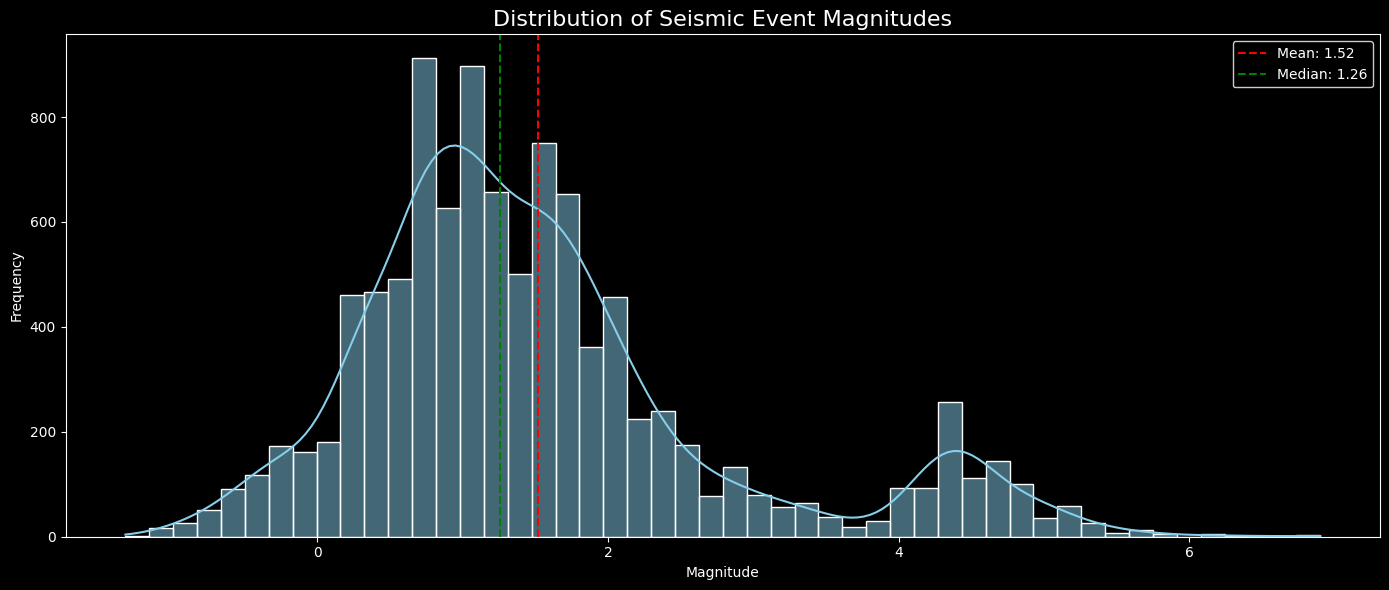

In [26]:
"""
Magnitude Distribution Analysis

This visualization shows the frequency distribution of earthquake magnitudes in our dataset.
Key components:
- Histogram: Shows frequency of events at each magnitude level
- KDE (Kernel Density Estimation): Smoothed curve showing the probability density
- Mean and median indicators: Vertical lines showing central tendency measures

The distribution shape reveals important characteristics about seismic activity patterns:
- Any bimodal patterns could indicate different seismic processes
- Skewness indicates whether smaller or larger events are more common
- The difference between mean and median indicates the effect of extreme events

Earthquake magnitudes often follow a logarithmic Gutenberg-Richter relationship,
where frequency decreases exponentially as magnitude increases.
"""
# Set style and create figure
plt.style.use('dark_background')
plt.figure(figsize=(14, 6))

# Create histogram with density estimation curve 
ax = sns.histplot(df_clean['mag'], bins=50, kde=True, color='skyblue')

# Add descriptive labels and title
plt.title('Distribution of Seismic Event Magnitudes', fontsize=16, color='white')
plt.xlabel('Magnitude', color='white')
plt.ylabel('Frequency', color='white')

# Add reference lines for central tendency measures
plt.axvline(df_clean['mag'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["mag"].mean():.2f}')
plt.axvline(df_clean['mag'].median(), color='green', linestyle='--', label=f'Median: {df_clean["mag"].median():.2f}')

# Add legend with custom styling
plt.legend(facecolor='black', edgecolor='white')
plt.tight_layout()

# Save high-resolution image
plt.savefig('magnitude_distribution.png', dpi=300, bbox_inches='tight')

## Magnitudes Histogram by Event Type


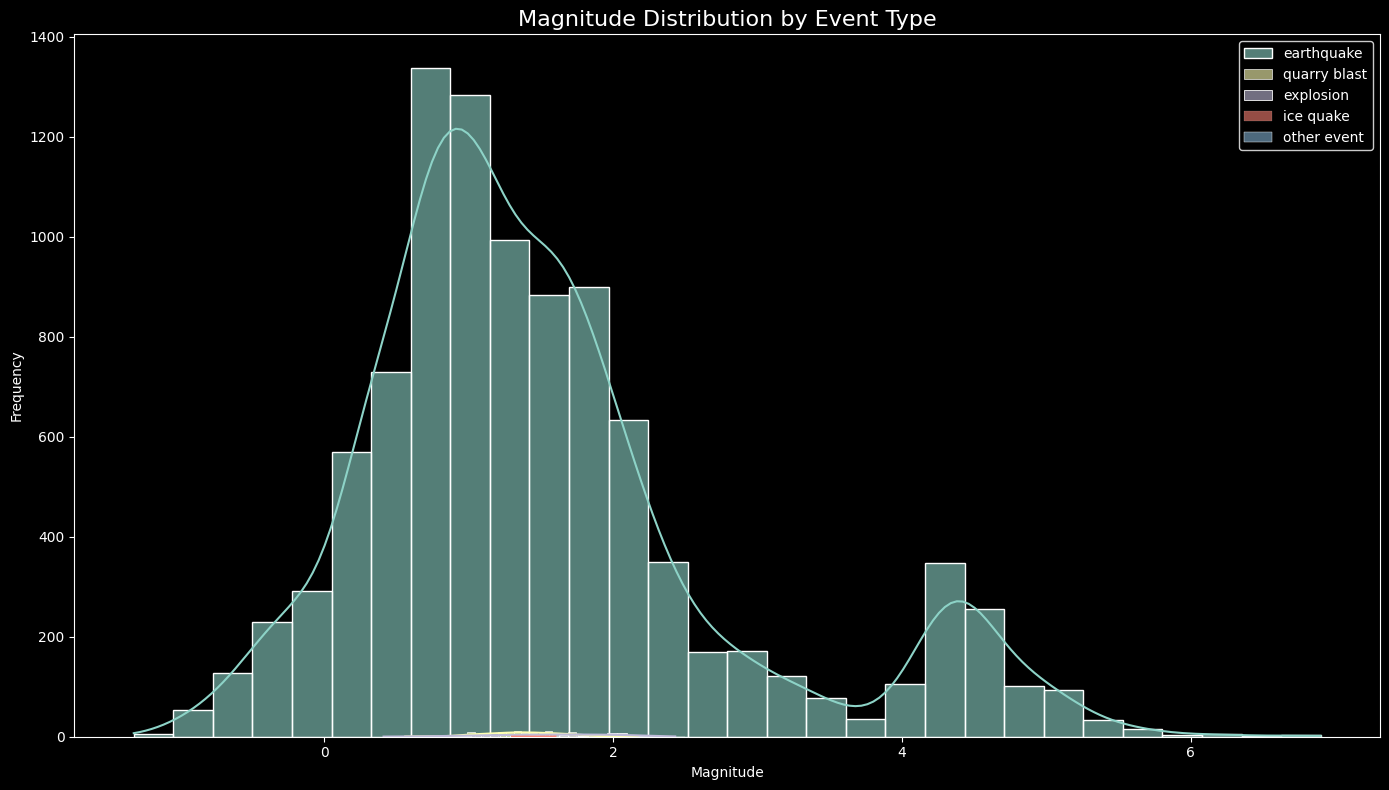

In [27]:
"""
Comparative Magnitude Distribution by Event Type

This visualization compares the magnitude distributions across different types of seismic events
using overlaid histograms with kernel density estimation (KDE). This approach allows us to:

1. Directly compare magnitude characteristics between earthquakes and other seismic events
   such as explosions, quarry blasts, and volcanic activity

2. Identify event-specific patterns:
   - Which event types tend to have higher or lower magnitudes
   - Different distribution shapes that might reflect underlying physical processes
   - Presence of bimodality or other unique distributions for specific event types

3. Assess the relative frequency of different magnitude ranges for each event type

The visualization uses transparent overlays with distinct colors to allow for clear comparison
while maintaining visibility of all distributions.
"""
# Set visual style
plt.style.use('dark_background')
plt.figure(figsize=(14, 8))

# Create separate histograms for each event type
for event_type in df_clean['type'].unique():
    # Create subset for this specific event type
    subset = df_clean[df_clean['type'] == event_type]
    
    # Plot histogram with density curve
    sns.histplot(
        subset['mag'],      # Magnitudes for this event type
        bins=30,            # Number of histogram bins
        kde=True,           # Add kernel density estimation curve
        alpha=0.6,          # Transparency to prevent overlap visibility issues
        label=event_type    # Label for the legend
    )

# Add descriptive title and labels
plt.title('Magnitude Distribution by Event Type', fontsize=16, color='white')
plt.xlabel('Magnitude', color='white')
plt.ylabel('Frequency', color='white')

# Add legend with custom styling
plt.legend(facecolor='black', edgecolor='white')
plt.tight_layout()

# Save high-resolution image
plt.savefig('magnitude_distribution_by_event_type.png', dpi=300, bbox_inches='tight')

## Depths Distribution


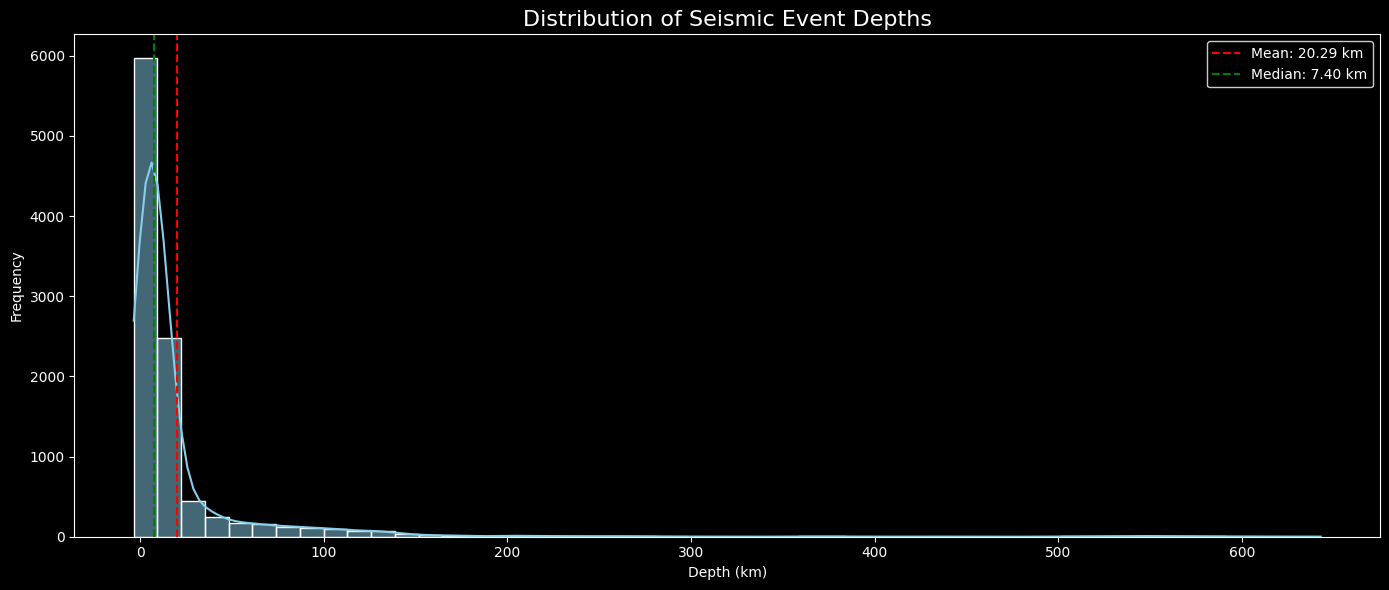

In [28]:
"""
Depth Distribution Analysis

This visualization examines the distribution of earthquake depths in our dataset, which
provides critical insights into the vertical structure of seismic activity.

Key insights from depth distribution:

1. Tectonic Context:
   - Shallow events (0-70 km): Typically crustal earthquakes, most common and usually most damaging
   - Intermediate events (70-300 km): Often associated with subduction zones
   - Deep events (>300 km): Rare, occur in specific geological contexts like deep subduction

2. Regional Hazard Assessment:
   - Different regions have characteristic depth profiles based on local tectonics
   - Areas with predominantly shallow events generally face higher ground-motion hazards
   - The most damaging earthquakes typically occur at shallow depths

3. Statistical Properties:
   - Mean vs. median comparison reveals skewness in the distribution
   - Clustering at certain depths can indicate distinct seismogenic layers
   - Outliers may represent measurement errors or rare deep-focus events

The histogram uses 50 bins to provide sufficient detail while smoothing out noise in the data.
"""
# Set visual style and figure dimensions
plt.style.use('dark_background')
plt.figure(figsize=(14, 6))

# Create histogram with density estimation curve
sns.histplot(df_clean['depth'], bins=50, kde=True, color='skyblue')

# Add descriptive title and axis labels
plt.title('Distribution of Seismic Event Depths', fontsize=16, color='white')
plt.xlabel('Depth (km)', color='white')
plt.ylabel('Frequency', color='white')

# Add reference lines for central tendency measures
plt.axvline(df_clean['depth'].mean(), color='red', linestyle='--', 
            label=f'Mean: {df_clean["depth"].mean():.2f} km')
plt.axvline(df_clean['depth'].median(), color='green', linestyle='--', 
            label=f'Median: {df_clean["depth"].median():.2f} km')

# Add legend with custom styling
plt.legend(facecolor='black', edgecolor='white')
plt.tight_layout()

# Save high-resolution image
plt.savefig('depth_distribution.png', dpi=300, bbox_inches='tight')

## Magnitudes and Depths Relationship


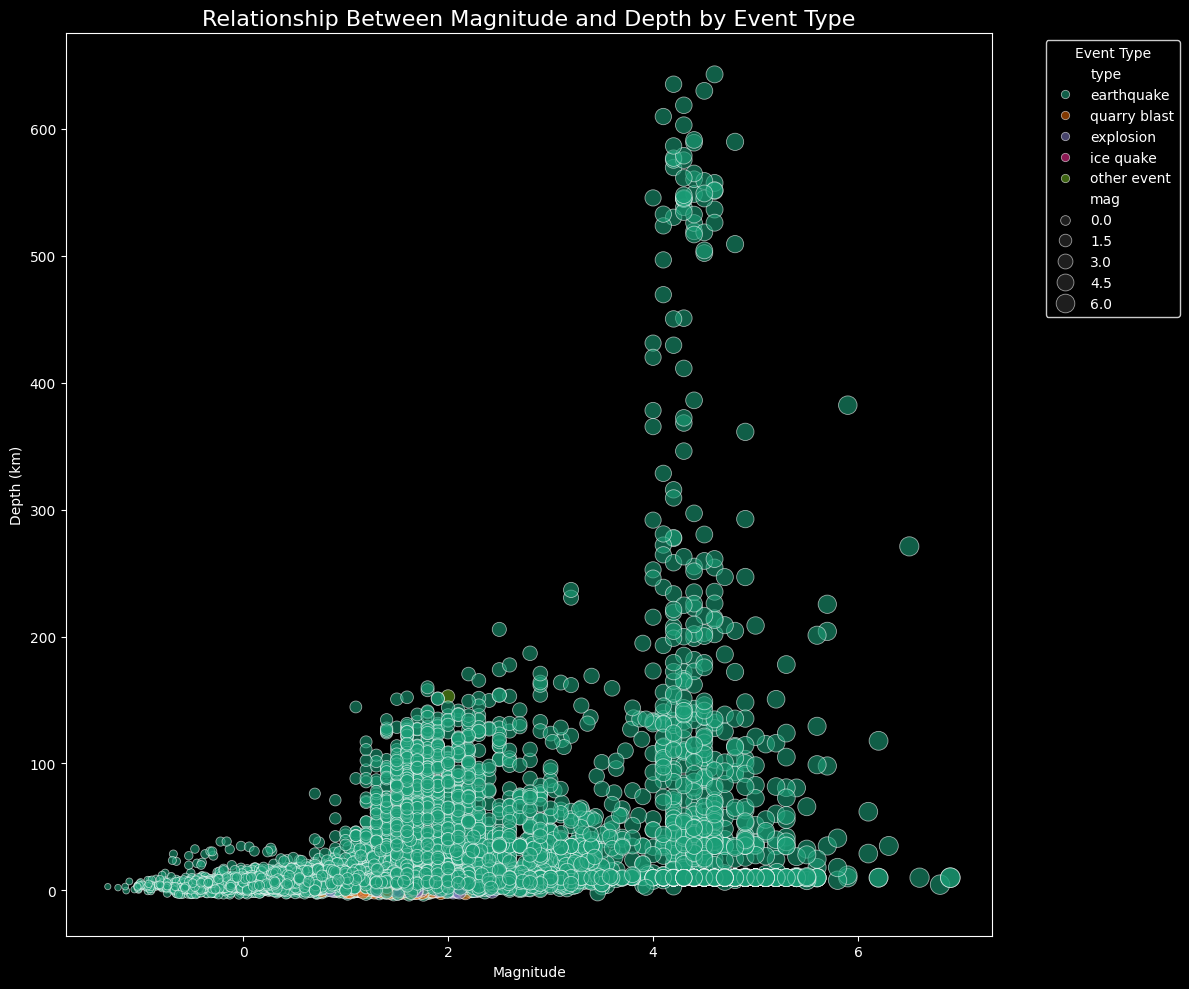

In [29]:
"""
Relationship Between Magnitude and Depth by Event Type

This visualization explores the critical relationship between earthquake magnitude and depth,
separated by event type. This relationship is important for several reasons:

1. Geological Significance: Different tectonic settings produce characteristic depth-magnitude patterns
   - Subduction zones: Deep, potentially high-magnitude events
   - Transform boundaries: Shallow, variable magnitude events
   - Intraplate regions: Sometimes deeper events with moderate magnitudes

2. Hazard Assessment: Shallow, high-magnitude events typically pose the greatest risk to
   infrastructure and populations due to stronger ground shaking.

3. Event Type Differentiation: The scatter plot reveals how different seismic event types
   (earthquakes, explosions, etc.) cluster in distinct regions of the magnitude-depth space.

The point size also scales with magnitude to provide a visual emphasis on larger events.
"""
# Set visual style and figure size
plt.style.use('dark_background')
plt.figure(figsize=(12, 10))

# Create scatter plot with multiple dimensions of data:
# - X-axis: Magnitude
# - Y-axis: Depth
# - Color: Event type
# - Size: Magnitude (redundant with x-axis but provides visual emphasis)
scatter = sns.scatterplot(
    x='mag',                   # Earthquake magnitude
    y='depth',                 # Depth in km
    hue='type',                # Color points by event type
    size='mag',                # Size points by magnitude for emphasis
    sizes=(20, 200),           # Range of point sizes
    data=df_clean,             # Dataset 
    palette='Dark2',           # Color palette suitable for categorical data
    alpha=0.6                  # Transparency helps with overlapping points
)

# Add descriptive labels and title
plt.title('Relationship Between Magnitude and Depth by Event Type', fontsize=16, color='white')
plt.xlabel('Magnitude', color='white')
plt.ylabel('Depth (km)', color='white')

# Add legend with custom positioning and styling
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left', facecolor='black', edgecolor='white')
plt.tight_layout()

# Save high-resolution image for publication
plt.savefig('magnitude_vs_depth_by_event_type.png', dpi=300, bbox_inches='tight')

## Earthquakes Heatmap


In [30]:
"""
Global Earthquake Heatmap Visualization

This visualization creates an interactive heatmap of seismic events using Folium and the HeatMap plugin.
Key features include:

1. Geographic Distribution: Shows the global pattern of seismic activity, highlighting
   tectonic plate boundaries and active fault zones.

2. Intensity Weighting: The heatmap is weighted by magnitude, so stronger earthquakes
   contribute more intensity to the visualization.

3. Interactive Capabilities:
   - Zoom and pan functionality to explore specific regions
   - Dark basemap (CartoDB dark_matter) for optimal contrast with the heat colors
   - Scale control for distance reference

The result is both an analytical tool and a compelling visualization that clearly shows
the 'Ring of Fire' around the Pacific and other major seismic zones.

The map is saved as an HTML file for interactive exploration and as a static PNG for reports.
"""
# Create an interactive folium map centered on the mean coordinates of all events
m = folium.Map(
    location=[df_clean['latitude'].mean(), df_clean['longitude'].mean()],  # Center on average coordinates
    zoom_start=2,              # Initial zoom level to show global view
    control_scale=True,        # Add scale bar for distance reference
    tiles='CartoDB dark_matter'  # Dark basemap for better contrast with heat colors
)

# Add the heatmap layer with earthquake data
# Using latitude, longitude, and magnitude (as weights)
HeatMap(
    data=df_clean[['latitude', 'longitude', 'mag']],  # Lat/lon coordinates and magnitude as weight
    radius=15,     # Size of each point's influence in pixels
    max_zoom=13    # Maximum zoom level where the heatmap is visible
).add_to(m)

# Save the interactive map as an HTML file
m.save('earthquake_heatmap.html')

# Return the interactive folium map for display in the notebook
m

## Final Numeric Matrix

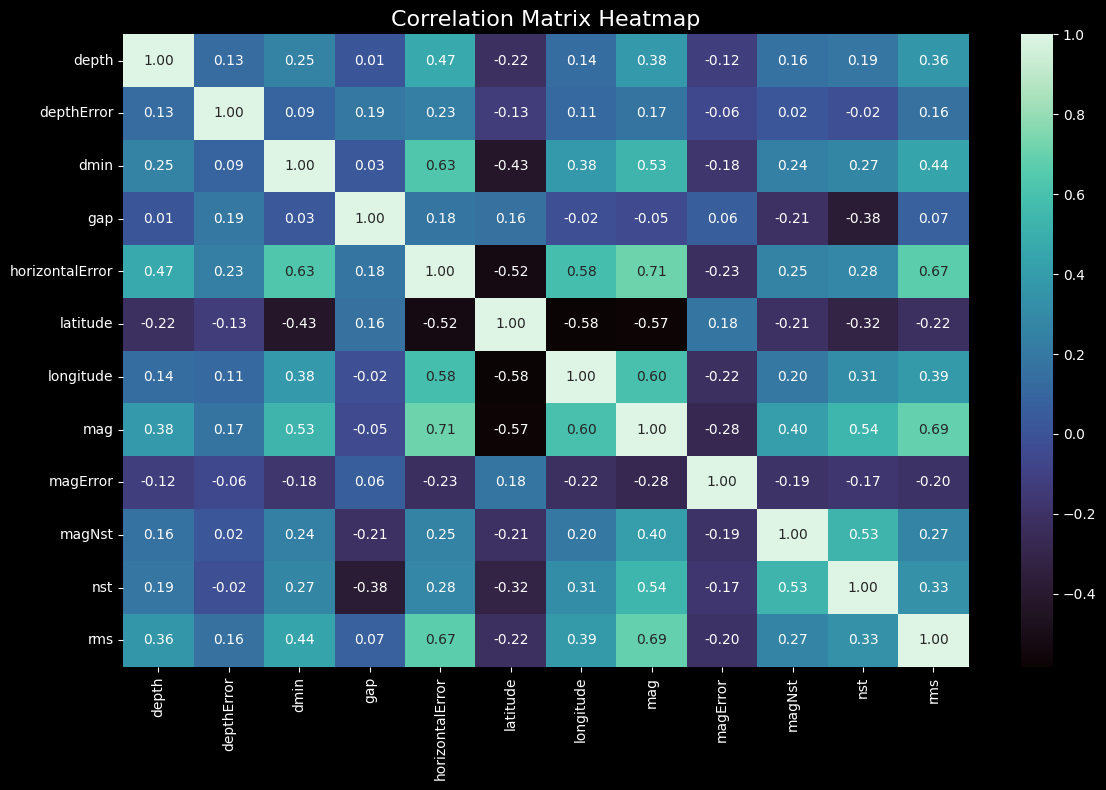

In [31]:
"""
Correlation Matrix Analysis of Seismic Variables

This visualization creates a heatmap showing the correlation coefficients between all numeric 
variables in our earthquake dataset. This analysis is crucial for:

1. Variable Relationships: Identifying which earthquake parameters are most strongly related
   - Positive correlations (closer to 1): Variables that increase together
   - Negative correlations (closer to -1): When one variable increases, the other decreases
   - Near-zero correlations: Variables with limited linear relationship

2. Multicollinearity Detection: Finding variables that provide redundant information,
   which is important for any subsequent modeling or machine learning applications.

3. Insights for Seismic Research:
   - How magnitude relates to depth and error measurements
   - Relationships between error metrics (horizontal error, RMS, etc.)
   - Dependencies between number of stations and other variables

The heatmap uses the 'mako' color scheme on a dark background, with annotated correlation 
values for precise interpretation.
"""
# Select numerical columns excluding date-related columns
numerical_columns = df_clean.select_dtypes(include=['number']).columns.difference(['year', 'month', 'day', 'hour', 'minute']).tolist()

# Calculate the Pearson correlation matrix for numerical columns
correlation_matrix = df_clean[numerical_columns].corr()

# Define labels for the heatmap
labels = correlation_matrix.columns

# Create the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,       # Correlation matrix data
    annot=True,               # Show correlation values on cells
    fmt=".2f",                # Format correlation values to 2 decimal places
    cmap="mako",              # Color scheme suitable for dark background
    cbar=True,                # Include a color bar for reference
    xticklabels=labels,       # Use variable names for x-axis
    yticklabels=labels        # Use variable names for y-axis
)

# Add title and styling
plt.title("Correlation Matrix Heatmap", fontsize=16, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()

*💡 The high correlation between horizontal error and RMS with magnitude is due to the fact that, as the magnitude of a seismic event increases, the complexity and energy released also tend to increase, which can make it more difficult to precisely locate the epicenter. This leads to greater uncertainties in both the horizontal error and the RMS, resulting in a strong linear relationship between these variables and magnitude.*